In [1]:
import sys
sys.path.append("../..")
from model.config import build_state, build_params, experimental_setups
from model.psub import psub_blocks

import numpy as np


from cadCAD_tools import profile_run
from cadCAD_tools.profiling.visualizations import visualize_substep_impact
import plotly.io as pio
pio.renderers.default = "png"

from model.config import build_state, build_params, experimental_setups

experiment_keys = 'Base'
experimental_setup = experimental_setups[experiment_keys]
initial_conditions = build_state(experimental_setup["config_option_state"])
params = build_params(experimental_setup["config_option_params"])
partial_state_update_blocks = psub_blocks
TIMESTEPS = experimental_setup['T']
SAMPLES = experimental_setup['monte_carlo_n']

df = profile_run(initial_conditions,
              params,
              partial_state_update_blocks,
              TIMESTEPS,
              SAMPLES,
              assign_params=True)



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.0
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 365, 74, 1, 28)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (365, 74, 1, 28)


Initializing configurations:   0%|          | 0/1 [00:00<?, ?it/s]

Execution Method: single_proc_exec
Execution Mode: single_threaded
2023-12-21 12:24:47.485410


Flattening results:   0%|          | 0/8396 [00:00<?, ?it/s]

Total execution time: 14.90s


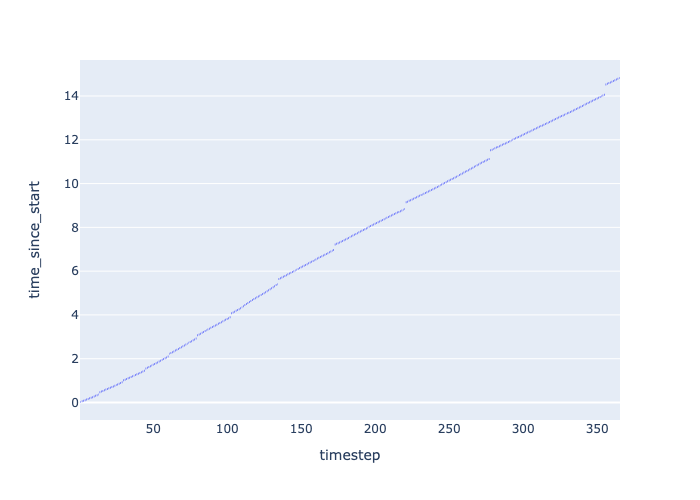

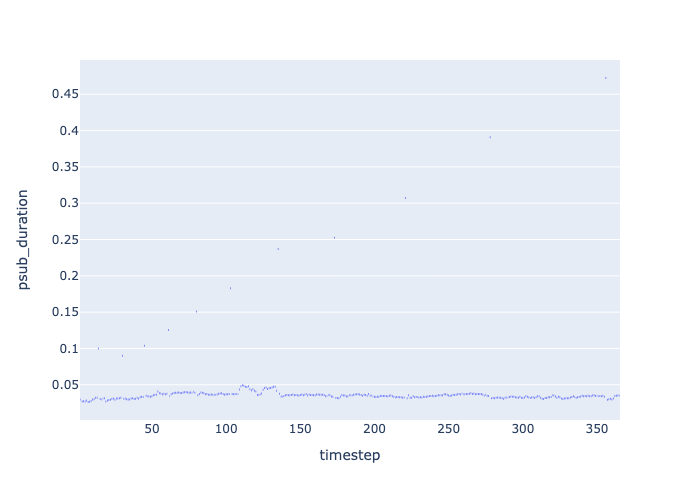

In [2]:
from cadCAD_tools.profiling.visualizations import visualize_elapsed_time_per_ts

fig = visualize_elapsed_time_per_ts(df, relative=False)
fig.show()
fig = visualize_elapsed_time_per_ts(df, relative=True)
fig.show()

  0%|          | 0/365 [00:00<?, ?it/s]

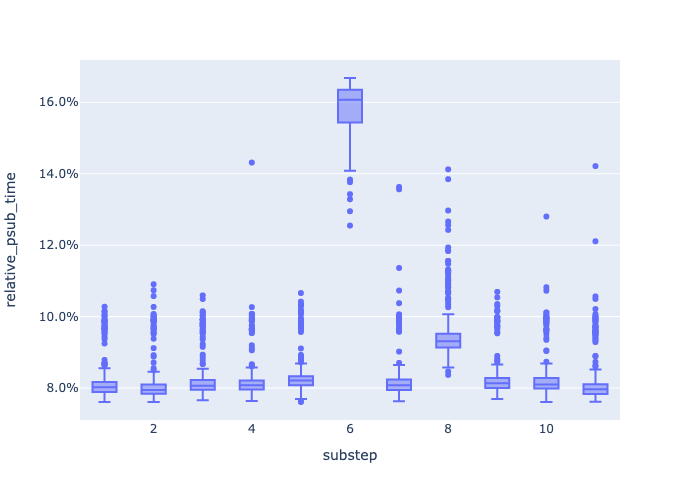

  0%|          | 0/365 [00:00<?, ?it/s]

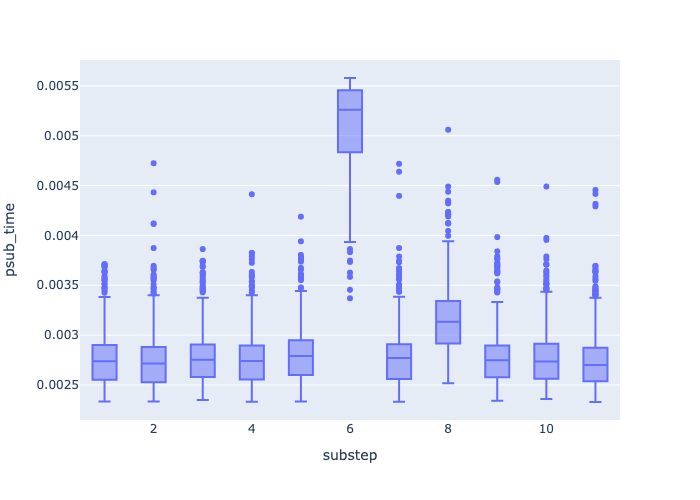

In [3]:
fig = visualize_substep_impact(df, relative=True)
fig.show()

fig = visualize_substep_impact(df, relative=False)
fig.show()